實作三個最佳化演算法

RO

In [ ]:
import random
import numpy as np
import math
# 修改目标函数以处理向量输入
def r_objective_function(x):
    # 计算x向量的范数
    norm_x = np.linalg.norm(x)
    x1 = np.sqrt(np.sqrt(norm_x))
    angle_in_radians = math.radians(x1)
    sin_value = math.sin(angle_in_radians)
    # 返回 -norm_x * sin_value
    return -norm_x * sin_value

def random_optimization(bounds, iterations, adaptive=False):
    # 显式设置的初始位置
    initial_positions = [np.array([-480,375]), np.array([-45,45])]
    best_solution = None
    best_evaluation = float('inf')

    history = []  # 用于存储每次迭代的解和评估值

    # 初始步長，这里是针对每一个维度定义初始步长
    step_sizes = [bound[1] - bound[0] for bound in bounds]

    for iteration in range(iterations):
        # 隨機生成一個解，对每个维度使用uniform
        candidate_solution = np.array([random.uniform(bound[0], bound[1]) for bound in bounds])

        # 評估新生成的解
        candidate_evaluation = r_objective_function(candidate_solution)

        # 记录解和评估值
        history.append((candidate_solution, candidate_evaluation))

        # 檢查是否為目前最佳解
        if candidate_evaluation < best_evaluation:
            best_solution, best_evaluation = candidate_solution, candidate_evaluation
            print(f"New best solution {best_solution} with evaluation {best_evaluation} at iteration {iteration}")

        # 如果啟用適應性步長，根據进程逐步减少每个维度的步长并调整边界
        if adaptive:
            step_sizes = [step * 0.99 for step in step_sizes]
            bounds = [(max(bounds[i][0], best_solution[i] - step_sizes[i]),
                       min(bounds[i][1], best_solution[i] + step_sizes[i])) for i in range(len(bounds))]
    return history

# 设置二维问题的初始边界
initial_bounds = [(-500, 500), (-500, 500)]
num_iterations = 1000

# 显式设置的初始位置
initial_positions = [np.array([-480, 375]), np.array([45, -45])]

# 呼叫改进的随机最佳化算法
#best_sol, best_eval = random_optimization(initial_bounds, num_iterations, adaptive=True)


PSO

In [ ]:
import random
import numpy as np
import math

# 修改目标函数以处理向量输入
def p_objective_function(x):
    # 计算x向量的范数
    norm_x = np.linalg.norm(x)
    x1 = np.sqrt(np.sqrt(norm_x))
    angle_in_radians = math.radians(x1)
    sin_value = math.sin(angle_in_radians)
    # 返回 -norm_x * sin_value
    return -norm_x * sin_value

# PSO 参数初始化
class Particle:
    def __init__(self, bounds):
        self.position = np.array([random.uniform(bound[0], bound[1]) for bound in bounds])  # 粒子位置
        self.velocity = np.array([0.0 for _ in bounds])  # 粒子速度
        self.best_position = np.copy(self.position)  # 粒子最佳位置
        self.best_value = float('inf')  # 最佳值

def pso(objective, bounds, num_particles, iterations, w=0.5, c1=1.5, c2=1.5):
      # 显式设置的初始位置
    initial_positions = [np.array([-480,375]), np.array([-45,45])]
    swarm = [Particle(bounds) for _ in range(num_particles)]
    global_best_value = float('inf')
    global_best_position = None
    history = []

    for _ in range(iterations):
        for particle in swarm:
            current_value = objective(particle.position)
            if current_value < particle.best_value:
                particle.best_position = particle.position.copy()
                particle.best_value = current_value
                if current_value < global_best_value:
                    global_best_value = current_value
                    global_best_position = particle.position.copy()
                    history.append((global_best_position.copy(), global_best_value))

            particle.velocity = w * particle.velocity + \
                c1 * random.random() * (particle.best_position - particle.position) + \
                c2 * random.random() * (global_best_position - particle.position)
            particle.position += particle.velocity
    return history



# 显式设置的初始位置
initial_positions = [np.array([-480, 375]), np.array([45, -45])]




WOA

In [ ]:
import random
import numpy as np
import math
# 修改目标函数以处理二维向量输入
def w_objective_function(x):
    norm_x = np.linalg.norm(x)
    if np.isinf(norm_x):  # 检查是否为无穷大
        return float('inf')  # 适当处理，这里直接返回无穷大作为函数值
    x1 = np.sqrt(np.sqrt(norm_x))
    angle_in_radians = math.radians(x1)
    sin_value = math.sin(angle_in_radians)
    return -norm_x * sin_value

# 初始化鲸鱼为二维向量
def initialize_whales(num_whales, bounds):
    whales = np.random.uniform(bounds[0][0], bounds[0][1], (num_whales, 2))
    return whales

# 更新鲸鱼位置，适应二维向量
def update_position(whales, best_position, a, a2):
    updated_whales = []
    for whale in whales:
        r = random.random()
        A = 2 * a * r - a
        C = 2 * r
        b = 1
        l = (a2 - 1) * random.random() + 1
        p = random.random()
        if p < 0.5:
            if abs(A) > 1:
                rand_index = random.randint(0, len(whales) - 1)
                rand_whale = whales[rand_index]
                D = abs(C * rand_whale - whale)
                updated_whales.append(rand_whale - A * D)
            else:
                D = abs(C * best_position - whale)
                updated_whales.append(best_position - A * D)
        else:
            D = abs(best_position - whale)
            updated_whales.append(best_position - np.exp(b * l) * np.cos(2 * np.pi * l) * D)
    return np.array(updated_whales)

# 执行WOA适用于二维
def woa(objective, bounds, num_whales, iterations):
      # 显式设置的初始位置
    initial_positions = [np.array([-480,375]), np.array([-45,45])]
    whales = initialize_whales(num_whales, bounds)
    best_position = whales[np.argmin([objective(whale) for whale in whales])]
    best_value = objective(best_position)
    history = []

    for i in range(iterations):
        a = 2 - 2 * i / iterations
        a2 = -1 + i / iterations * 2

        whales = update_position(whales, best_position, a, a2)
        for idx, whale in enumerate(whales):
            fitness = objective(whale)
            if fitness < best_value:
                best_value = fitness
                best_position = whale
                history.append((best_position.copy(), best_value))

    return history

# 设置二维问题的初始边界
bounds = [(-500, 500), (-500, 500)]
num_whales = 30
iterations = 1000

# 显式设置的初始位置
initial_positions = [np.array([-480, 375]), np.array([45, -45])]



畫圖

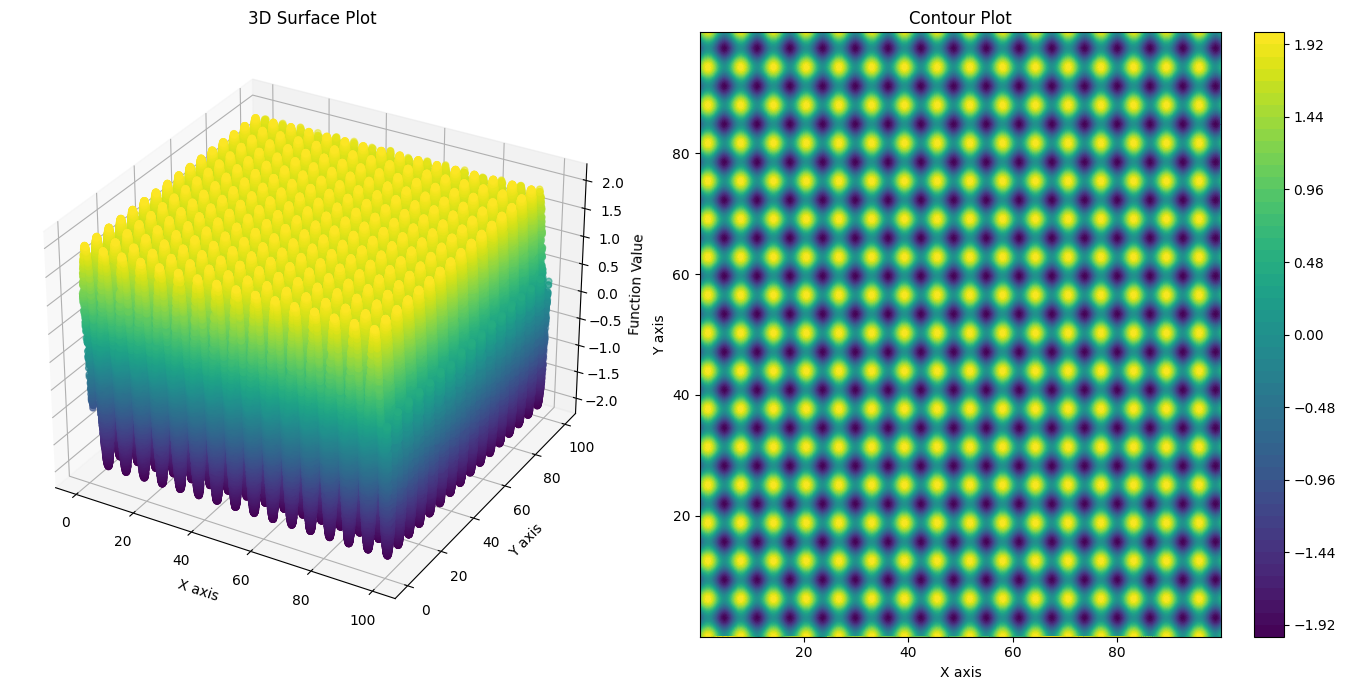

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置随机数的范围
lower_bound = 0
upper_bound = 100
# 设置生成的数据对数量
num_pairs = 10**6
# 生成随机数对
data_pairs = np.random.uniform(lower_bound, upper_bound, (num_pairs, 2))
# 定义函数
def my_function(x, y):
    return np.sin(x) + np.cos(y)
# 计算函数值
func_values = my_function(data_pairs[:, 0], data_pairs[:, 1])

# 为了可视化，我们需要减少数据点的数量，一百万个点在图上可能太多
sample_size = 1000000
indices = np.random.choice(num_pairs, sample_size, replace=False)
sampled_pairs = data_pairs[indices]
sampled_values = func_values[indices]

# 创建3D图
fig = plt.figure(figsize=(14, 7))

# 添加3D子图
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(sampled_pairs[:, 0], sampled_pairs[:, 1], sampled_values, c=sampled_values, cmap='viridis')
ax1.set_title('3D Surface Plot')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Function Value')

# 添加等高线图子图
ax2 = fig.add_subplot(122)
contour = ax2.tricontourf(sampled_pairs[:, 0], sampled_pairs[:, 1], sampled_values, levels=50, cmap='viridis')
fig.colorbar(contour, ax=ax2, orientation='vertical')
ax2.set_title('Contour Plot')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')

# 展示图像
plt.tight_layout()
plt.show()


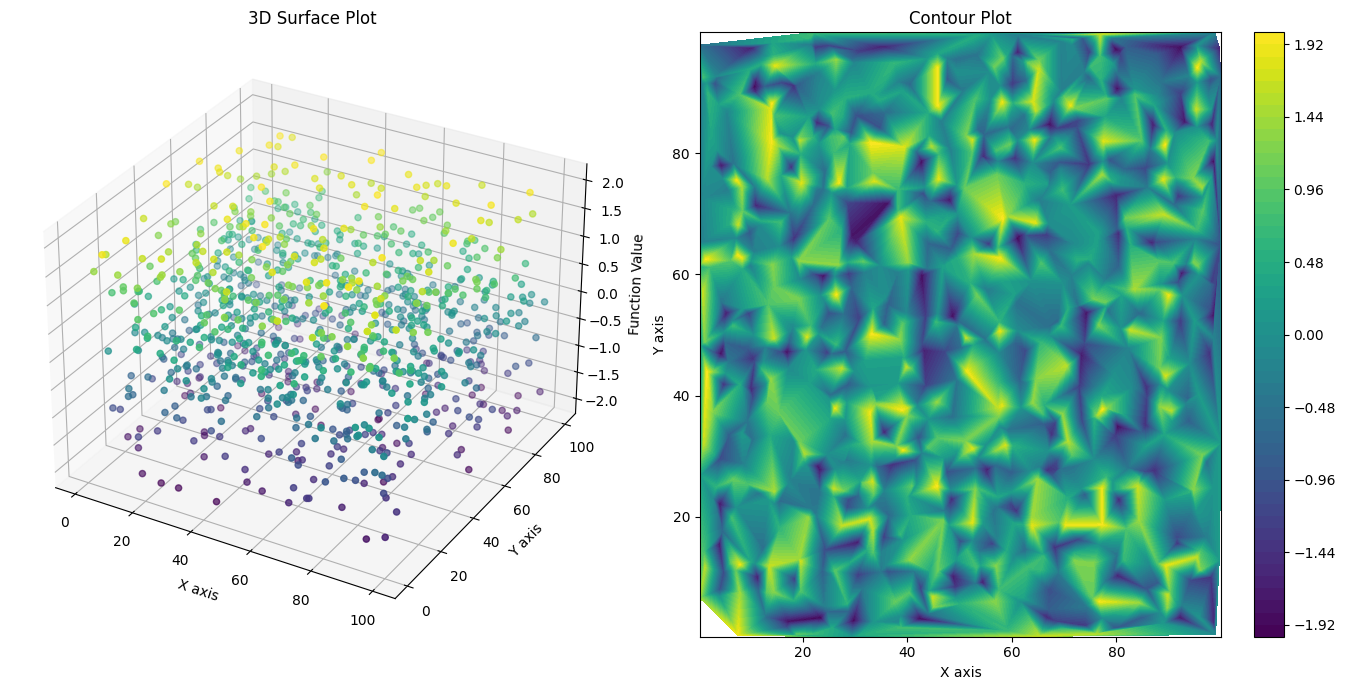

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置随机数的范围
lower_bound = 0
upper_bound = 100

# 设置生成的数据对数量
num_pairs = 10**6

# 生成随机数对
data_pairs = np.random.uniform(lower_bound, upper_bound, (num_pairs, 2))

# 定义函数
def my_function(x, y):
    return np.sin(x) + np.cos(y)

# 计算函数值
func_values = my_function(data_pairs[:, 0], data_pairs[:, 1])

# 为了可视化，我们需要减少数据点的数量，一百万个点在图上可能太多
sample_size = 1000
indices = np.random.choice(num_pairs, sample_size, replace=False)
sampled_pairs = data_pairs[indices]
sampled_values = func_values[indices]

# 创建3D图
fig = plt.figure(figsize=(14, 7))

# 添加3D子图
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(sampled_pairs[:, 0], sampled_pairs[:, 1], sampled_values, c=sampled_values, cmap='viridis')
ax1.set_title('3D Surface Plot')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Function Value')

# 添加等高线图子图
ax2 = fig.add_subplot(122)
contour = ax2.tricontourf(sampled_pairs[:, 0], sampled_pairs[:, 1], sampled_values, levels=50, cmap='viridis')
fig.colorbar(contour, ax=ax2, orientation='vertical')
ax2.set_title('Contour Plot')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')

# 展示图像
plt.tight_layout()
plt.show()

三個演算法

In [ ]:
import pandas as pd

# 参数设置
bounds = [(-500, 500) for _ in range(2)]  # 十维问题的边界
iterations = 1000
num_particles = 30
num_whales = 30

results1 = history_random = random_optimization(bounds, iterations, adaptive=False)
initial_random = history_random[0]
last_5_random = history_random[-5:]
best_solution_random = min(history_random, key=lambda x: x[1])

results2 = history_pso = pso(p_objective_function, bounds, num_particles, iterations, w=0.5, c1=1.5, c2=1.5)
initial_pso = history_pso[0]
last_5_pso = history_pso[-5:]
best_solution_pso = min(history_pso, key=lambda x: x[1])

results3 = history_woa = woa(w_objective_function, bounds, num_whales, iterations)
initial_woa = history_woa[0]
last_5_woa = history_woa[-5:]
best_solution_woa = min(history_woa, key=lambda x: x[1])


# 创建数据表
data = {
    'Algorithm': ['random_optimization', 'pso', 'woa'],
    'Initial Solution': [initial_random, initial_pso, initial_woa],
    'Last 5 Solutions': [last_5_random, last_5_pso, last_5_woa],
    'Best Solution': [best_solution_random, best_solution_pso, best_solution_woa]
}

# 使用Pandas DataFrame格式化输出
df = pd.DataFrame(data)
print(df.to_string(index=False))

New best solution [-433.37627774  470.35502809] with evaluation -56.063356896946665 at iteration 0
New best solution [-440.8285764  488.5887957] with evaluation -58.09612375255305 at iteration 46
New best solution [-482.94364312  478.47694471] with evaluation -60.50708113226049 at iteration 225
New best solution [-487.10995952 -483.51881957] with evaluation -61.23165466996514 at iteration 788
          Algorithm                                                Initial Solution                                                                                                                                                                                                                                                                                                                                                                                                     Last 5 Solutions                                                                    Best Solution
random_optimization ([-433.3762777

畫圖

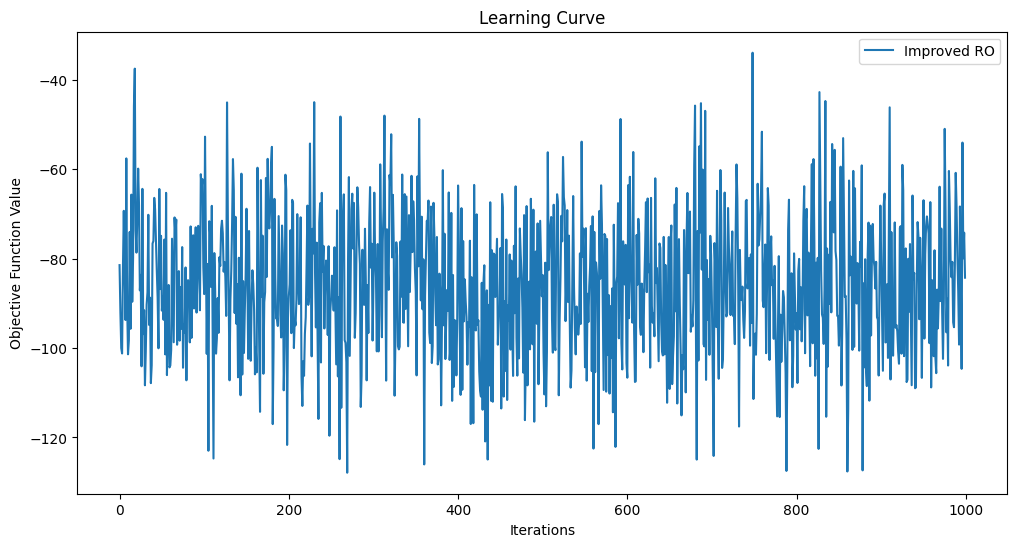

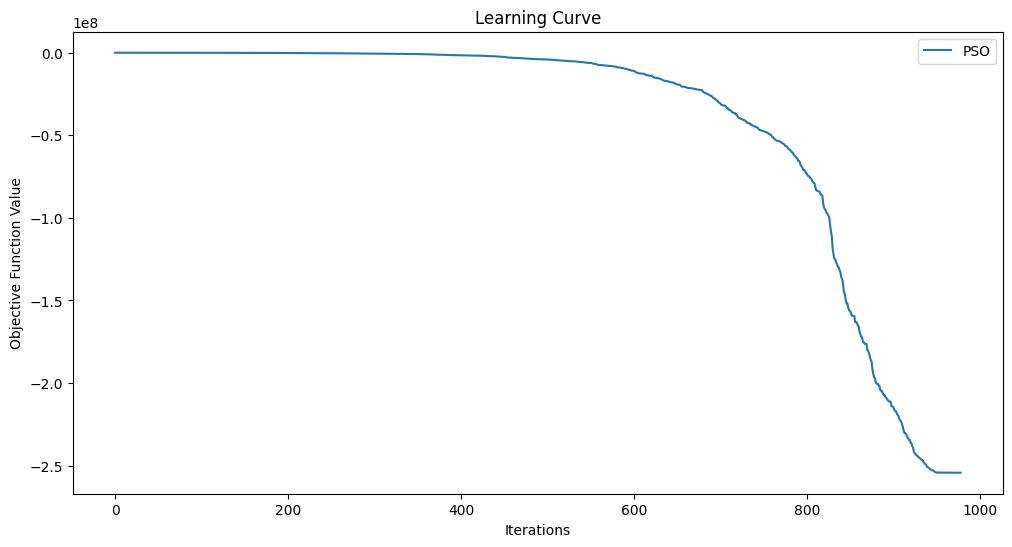

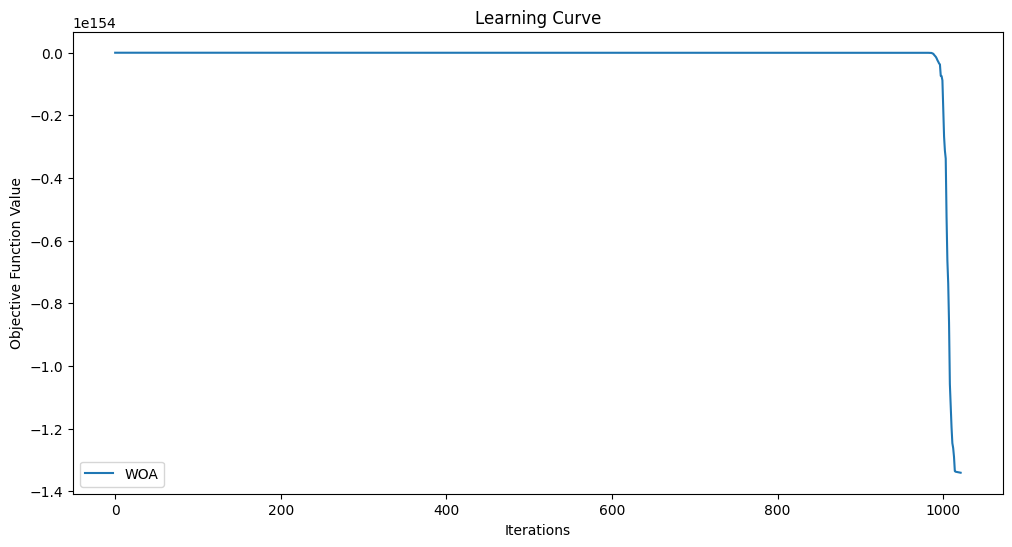

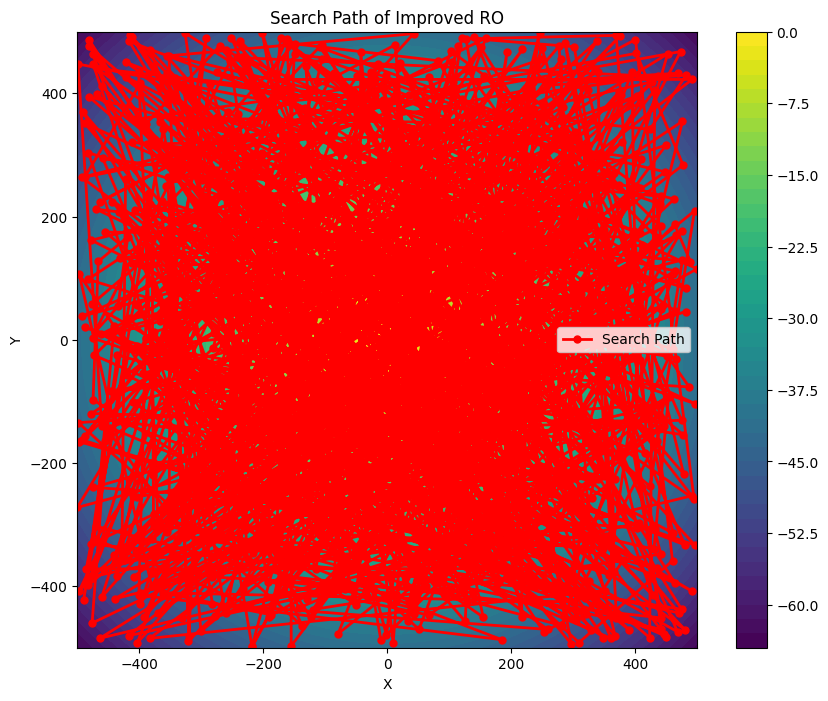

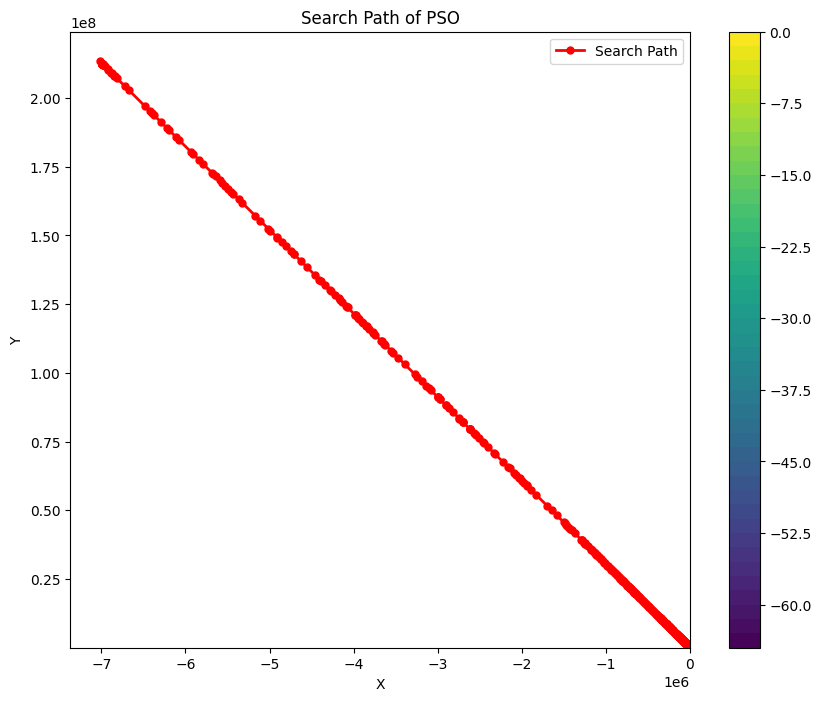

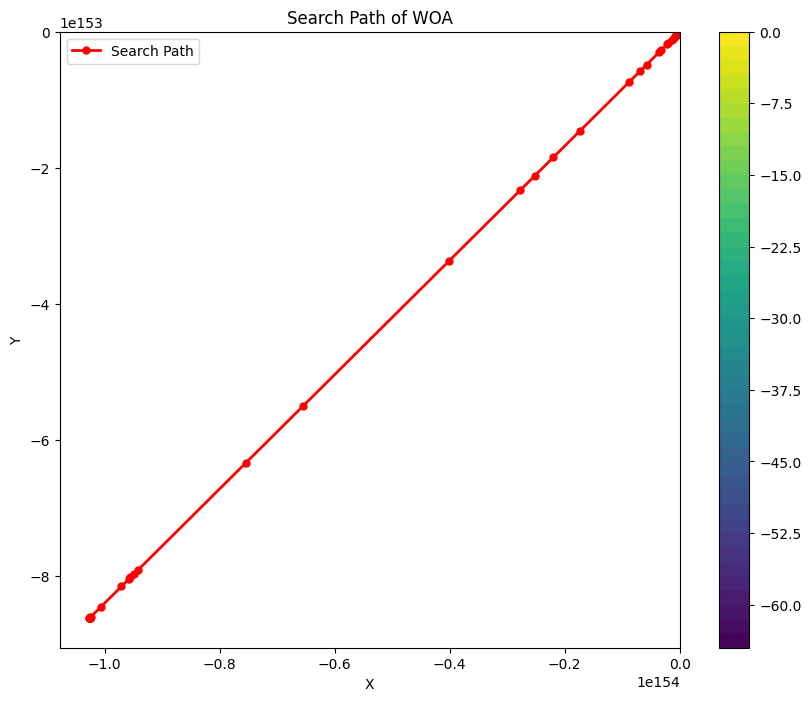

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# 绘制学习曲线图
plt.figure(figsize=(12, 6))
plt.plot([val for _, val in history_random], label='Improved RO')
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.legend()
plt.show()
# 绘制学习曲线图
plt.figure(figsize=(12, 6))
plt.plot([val for _, val in history_pso], label='PSO')
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.legend()
plt.show()
# 绘制学习曲线图
plt.figure(figsize=(12, 6))
plt.plot([val for _, val in history_woa], label='WOA')
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.legend()
plt.show()
def plot_search_path(history, title):
    plt.figure(figsize=(10, 8))  # 增大图形大小以提高可读性
    # 创建网格
    X, Y = np.meshgrid(np.linspace(-500, 500, 400), np.linspace(-500, 500, 400))
    # 计算Z值
    Z = np.array([[p_objective_function(np.array([x, y])) for x in np.linspace(-500, 500, 400)] for y in np.linspace(-500, 500, 400)])
    # 绘制等高线填充图
    cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(cp)  # 显示颜色条
    # 提取位置数据并绘制搜索路径
    positions = [pos for pos, _ in history]
    plt.plot([p[0] for p in positions], [p[1] for p in positions], 'r.-', label='Search Path', markersize=10, linewidth=2)  # 增加标记大小和线宽
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
# 假设history_random, history_pso, history_woa是从你的算法中得到的
# 调用函数绘制路径
plot_search_path(history_random, 'Search Path of Improved RO')
plot_search_path(history_pso, 'Search Path of PSO')
plot_search_path(history_woa, 'Search Path of WOA')




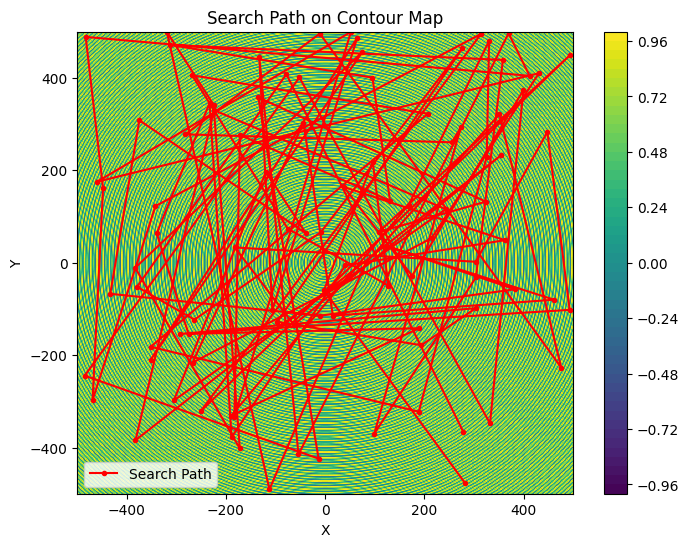

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 示例目标函数
def example_objective_function(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# 生成数据以绘制等高线图
x = np.linspace(-500, 500, 400)
y = np.linspace(-500, 500, 400)
X, Y = np.meshgrid(x, y)
Z = example_objective_function(X, Y)

# 假设 history 是 (position, evaluation) 元组列表
history = [(np.array([np.random.uniform(-500, 500), np.random.uniform(-500, 500)]), np.random.rand()) for _ in range(100)]

# 绘制搜索路径图
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
positions = [pos for pos, _ in history]
plt.plot([p[0] for p in positions], [p[1] for p in positions], 'r.-', label='Search Path')  # 使用红色线条确保可见性
plt.title('Search Path on Contour Map')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
